In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv("cltv1_5_10-10.csv")

In [3]:
data.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV1,cust_lifetime_value1,CLV5,cust_lifetime_value5,CLV10,cust_lifetime_value10,Unnamed: 12,CLV1.1,CLV5.1,CLV10.1
0,693,849,1010,30584.43638,36.024071,3058.443638,23877.33272,73027476.36,4775.466545,1.460550e+07,2387.733272,7302747.636,NaN,23877.33272,4775.466545,2387.733272
1,576,292,336,11638.26084,39.857058,1163.826084,26417.89776,30745838.50,5283.579552,6.149168e+06,2641.789776,3074583.850,NaN,26417.89776,5283.579552,2641.789776
2,667,624,1107,26139.02573,41.889464,2613.902573,27765.00951,72575029.81,5553.001902,1.451501e+07,2776.500951,7257502.981,NaN,27765.00951,5553.001902,2776.500951
3,413,210,269,11527.10832,54.890992,1152.710832,36382.63080,41938652.60,7276.526159,8.387731e+06,3638.263080,4193865.260,NaN,36382.63080,7276.526159,3638.263080
4,695,650,876,28095.09950,43.223230,2809.509950,28649.05082,80489793.35,5729.810164,1.609796e+07,2864.905082,8048979.335,NaN,28649.05082,5729.810164,2864.905082


In [7]:
km=KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [8]:
Y_pred=km.fit_predict(data[['CLV5']])#List of list hence double bracket

In [9]:
Y_pred

array([0, 4, 4, ..., 4, 4, 2])

In [10]:
data['cluster']=Y_pred

In [11]:
data

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV1,cust_lifetime_value1,CLV5,cust_lifetime_value5,CLV10,cust_lifetime_value10,Unnamed: 12,CLV1.1,CLV5.1,CLV10.1,cluster
0,693,849,1010,30584.43638,36.024071,3058.443638,23877.33272,7.302748e+07,4775.466545,1.460550e+07,2387.733272,7.302748e+06,NaN,23877.33272,4775.466545,2387.733272,0
1,576,292,336,11638.26084,39.857058,1163.826084,26417.89776,3.074584e+07,5283.579552,6.149168e+06,2641.789776,3.074584e+06,NaN,26417.89776,5283.579552,2641.789776,4
2,667,624,1107,26139.02573,41.889464,2613.902573,27765.00951,7.257503e+07,5553.001902,1.451501e+07,2776.500951,7.257503e+06,NaN,27765.00951,5553.001902,2776.500951,4
3,413,210,269,11527.10832,54.890992,1152.710832,36382.63080,4.193865e+07,7276.526159,8.387731e+06,3638.263080,4.193865e+06,NaN,36382.63080,7276.526159,3638.263080,2
4,695,650,876,28095.09950,43.223230,2809.509950,28649.05082,8.048979e+07,5729.810164,1.609796e+07,2864.905082,8.048979e+06,NaN,28649.05082,5729.810164,2864.905082,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,507,598,72929,23862.02113,39.903045,2386.202113,26448.37914,6.311118e+07,5289.675827,1.262224e+07,2644.837914,6.311118e+06,NaN,26448.37914,5289.675827,2644.837914,4
1578,636,877,1292,42260.24502,48.187281,4226.024502,31939.30321,1.349763e+08,6387.860642,2.699526e+07,3193.930321,1.349763e+07,NaN,31939.30321,6387.860642,3193.930321,2
1579,659,406,20329,16235.75225,39.989538,1623.575225,26505.70755,4.303401e+07,5301.141510,8.606802e+06,2650.570755,4.303401e+06,NaN,26505.70755,5301.141510,2650.570755,4
1580,539,350,119010,15166.47761,43.332793,1516.647761,28721.67106,4.356066e+07,5744.334211,8.712132e+06,2872.167106,4.356066e+06,NaN,28721.67106,5744.334211,2872.167106,4


No handles with labels found to put in legend.


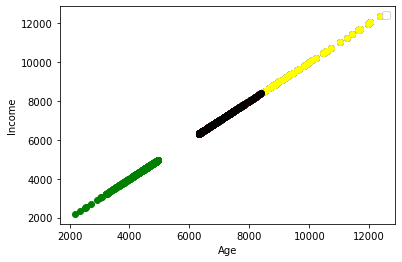

In [13]:
data1=data[data.cluster==0]
data2=data[data.cluster==1]
data3=data[data.cluster==2]
data4=data[data.cluster==3]
data5=data[data.cluster==4]

plt.scatter(data1.CLV5,data1['CLV5'],color="green")
plt.scatter(data2.CLV5,data2['CLV5'],color="blue")
plt.scatter(data3.CLV5,data3['CLV5'],color="red")
plt.scatter(data2.CLV5,data2['CLV5'],color="yellow")
plt.scatter(data3.CLV5,data3['CLV5'],color="black")

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [14]:
#ELBOW METHOD

k_range=range(1,10)
sse=[]

for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(data[['CLV5']])
    sse.append(km.inertia_)#inertia within cluster sum of squared error

In [15]:
sse

[3804248787.394895,
 1934361929.8118715,
 1081555189.901512,
 694525893.0958512,
 440915107.895329,
 314300139.6992912,
 233504866.5819523,
 180894496.19723314,
 142467041.48523355]

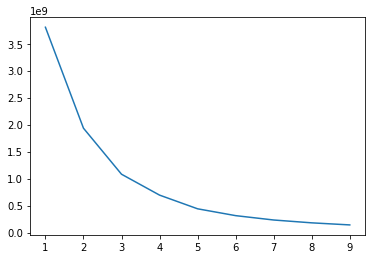

In [16]:
plt.plot(k_range,sse)

In [17]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [18]:
Y_pred=km.fit_predict(data[['CLV5']])#List of list hence double bracket

In [19]:
Y_pred

array([2, 2, 2, ..., 2, 0, 0])

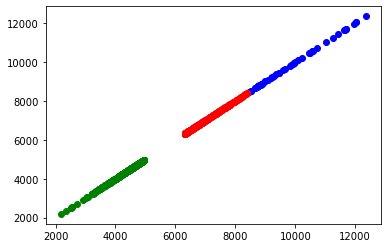

In [20]:
data1=data[data.cluster==0]
data2=data[data.cluster==1]
data3=data[data.cluster==2]

plt.scatter(data1.CLV5,data1['CLV5'],color="green")
plt.scatter(data2.CLV5,data2['CLV5'],color="blue")
plt.scatter(data3.CLV5,data3['CLV5'],color="red")

In [21]:
data['cluster']=Y_pred

In [22]:
data.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV1,cust_lifetime_value1,CLV5,cust_lifetime_value5,CLV10,cust_lifetime_value10,Unnamed: 12,CLV1.1,CLV5.1,CLV10.1,cluster
0,693,849,1010,30584.43638,36.024071,3058.443638,23877.33272,73027476.36,4775.466545,1.460550e+07,2387.733272,7302747.636,NaN,23877.33272,4775.466545,2387.733272,2
1,576,292,336,11638.26084,39.857058,1163.826084,26417.89776,30745838.50,5283.579552,6.149168e+06,2641.789776,3074583.850,NaN,26417.89776,5283.579552,2641.789776,2
2,667,624,1107,26139.02573,41.889464,2613.902573,27765.00951,72575029.81,5553.001902,1.451501e+07,2776.500951,7257502.981,NaN,27765.00951,5553.001902,2776.500951,2
3,413,210,269,11527.10832,54.890992,1152.710832,36382.63080,41938652.60,7276.526159,8.387731e+06,3638.263080,4193865.260,NaN,36382.63080,7276.526159,3638.263080,0
4,695,650,876,28095.09950,43.223230,2809.509950,28649.05082,80489793.35,5729.810164,1.609796e+07,2864.905082,8048979.335,NaN,28649.05082,5729.810164,2864.905082,0


In [23]:
data['cluster'].value_counts()

2    865
0    677
1     40
Name: cluster, dtype: int64

In [27]:
data.drop(['CLV1','cust_lifetime_value1','cust_lifetime_value5','cust_lifetime_value10','Unnamed: 12','CLV1.1','CLV5.1','CLV10.1'],axis=1,inplace=True)

In [28]:
data.to_csv("cltv1_5_10-10-with_clusters.csv")